In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import colors
import matplotlib as mpl
from scipy import stats

mpl.rcParams['font.size']=16

/tmp/ipykernel_34401/4155765722.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


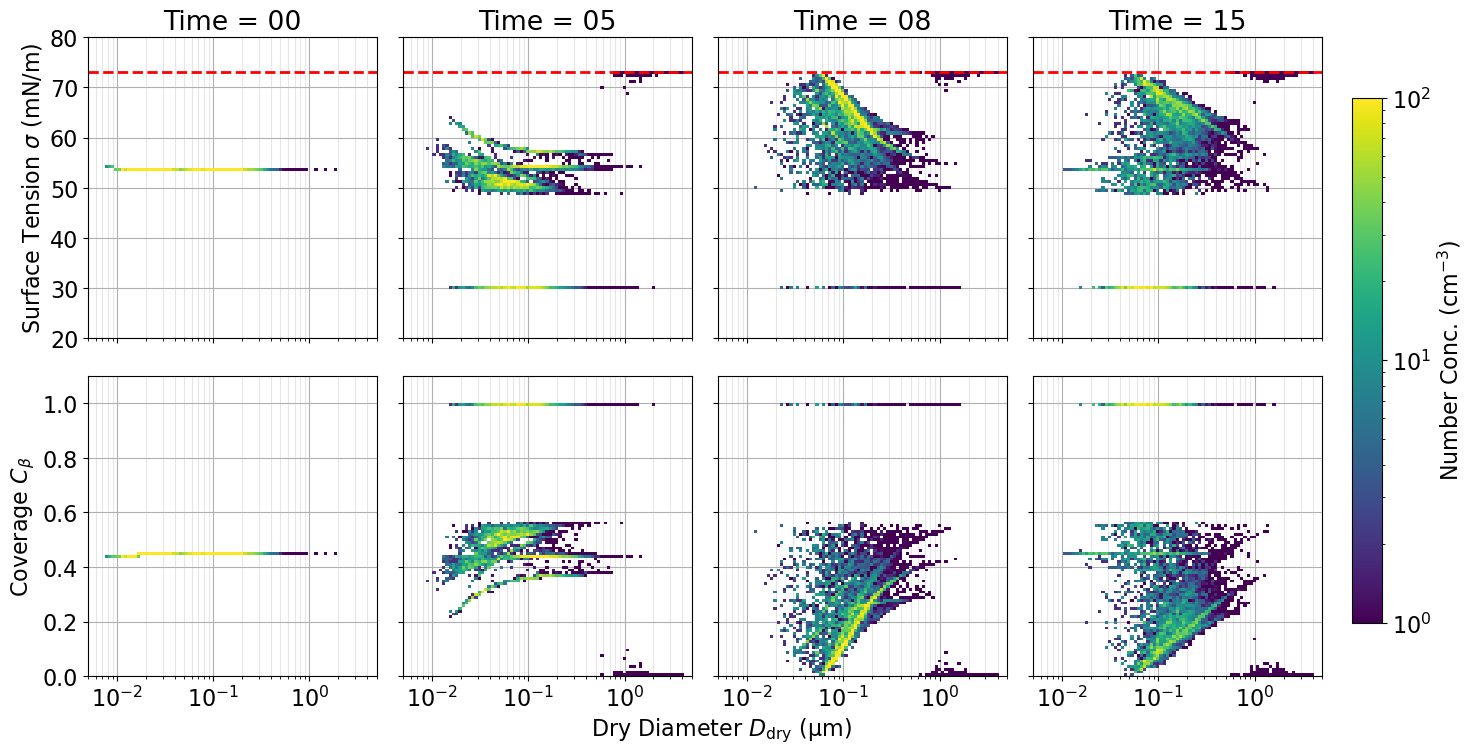

In [4]:
directory = 'out'
times = ['01', '06', '09', '16']

fig, axes = plt.subplots(2, 4, figsize=(15, 7.5), sharex='col', sharey='row')

# 用于存储binned_statistic_2d的返回值，以便后续添加colorbar
h_list = []

for i, time in enumerate(times):
    file = pd.read_csv('/data/keeling/a/xx24/d/proj_film/partmc/scenarios/1_urban_plume/'+directory+'/single_particle_000000'+time+'.csv', sep='\s+', header=None).set_index(0).T
    file.reset_index(drop=True, inplace=True)

    d_dry = file['dry_diameters']
    sigmas = file['sigmas'] 
    coverages = file['coverages'].clip(upper=1)
    num_con = file['num_con']/1e6

    x = np.logspace(-3, 3, 180, np.e)
    y_sigma = np.linspace(20, 80, 100)  
    y_coverage = np.linspace(0, 1, 100) 

    # 使用 stats.binned_statistic_2d 计算二维直方图
    h_sigma = stats.binned_statistic_2d(d_dry*1e6, sigmas*1000, values=num_con, statistic='sum', bins=[x, y_sigma])
    h_list.append(h_sigma)  # 保存 binned_statistic_2d 的返回值

    # 绘制二维直方图
    im_sigma = axes[0, i].pcolormesh(x, y_sigma, h_sigma.statistic.T, norm=colors.LogNorm(vmin=1e0, vmax=1e2))
    
    axes[0, i].set_xlim(5e-3, 5e0)
    axes[0, i].set_ylim(20, 80)
    axes[0, i].set_xscale("log")
    axes[0, i].set_title(f'Time = {int(time)-1:02d}') 
    if i == 0:
        axes[0, i].set_ylabel(r"Surface Tension $\sigma\ $(mN/m)")
    axes[0, i].axhline(y=73, ls='--', c='r', linewidth=2)  
    axes[0, i].set_axisbelow(True)
    axes[0, i].grid()
    axes[0, i].grid(which="minor", color="0.9")

    h_coverage = stats.binned_statistic_2d(d_dry*1e6, coverages, values=num_con, statistic='sum', bins=[x, y_coverage])
    h_list.append(h_coverage)  

    im_coverage = axes[1, i].pcolormesh(x, y_coverage, h_coverage.statistic.T, norm=colors.LogNorm(vmin=1e0, vmax=1e2))
    
    axes[1, i].set_xlim(5e-3, 5e0)
    axes[1, i].set_ylim(0, 1.1)
    axes[1, i].set_xscale("log")
    axes[1, i].set_axisbelow(True)
    axes[1, i].grid()
    axes[1, i].grid(which="minor", color="0.9")
    if i == 0:
        axes[1, i].set_ylabel(r"Coverage $C_\beta$")

cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])  
cb = fig.colorbar(im_sigma, cax=cbar_ax)
cb.set_label(label=r"Number Conc. ($\rm cm^{-3}$)")

fig.text(0.5, 0, r"Dry Diameter $D_{\rm dry}$ ($\rm \mu m$)", ha='center')

plt.tight_layout()
plt.subplots_adjust(right=0.9)
plt.savefig('/data/keeling/a/xx24/d/proj_film/sigma_coverage.pdf', dpi=300, bbox_inches='tight')
# plt.show()